In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
import os
import relative_accuracy as ra
from statistics import mean, stdev

In [3]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [4]:
import keras_tuner as kt
import MVA as ga
from keras_tuner import RandomSearch

In [5]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5.npz")['x'] 
Output_train_5 = np.load("Deep_train_5.npz")['y']

Deep_test_5   = np.load("Deep_test_5.npz")['x'] 
Output_test_5 = np.load("Deep_test_5.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15.npz")['x'] 
Output_train_15 = np.load("Deep_train_15.npz")['y']

Deep_test_15   = np.load("Deep_test_15.npz")['x'] 
Output_test_15 = np.load("Deep_test_15.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30.npz")['x'] 
Output_train_30 = np.load("Deep_train_30.npz")['y']

Deep_test_30   = np.load("Deep_test_30.npz")['x'] 
Output_test_30 = np.load("Deep_test_30.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60.npz")['x'] 
Output_train_60 = np.load("Deep_train_60.npz")['y']

Deep_test_60   = np.load("Deep_test_60.npz")['x'] 
Output_test_60 = np.load("Deep_test_60.npz")['y']

In [6]:
scaler_filename = "scaler.save"
scaler = joblib.load(scaler_filename) 

In [7]:
Test      = pd.read_csv('01test_scaled.csv', index_col=0, parse_dates=[8])

## Input

#### 5 mins

In [8]:
# Train
Xt5 = Deep_train_5
yt5 = Output_train_5
# Test
Xv5 = Deep_test_5
yv5 = Output_test_5

#### 15 mins

In [9]:
# Train
Xt15 = Deep_train_15
yt15 = Output_train_15
# Test
Xv15 = Deep_test_15
yv15 = Output_test_15

#### 30 mins

In [10]:
# Train
Xt30 = Deep_train_30
yt30 = Output_train_30
# Test
Xv30 = Deep_test_30
yv30 = Output_test_30

#### 60 mins

In [11]:
# Train
Xt60 = Deep_train_60
yt60 = Output_train_60
# Test
Xv60 = Deep_test_60
yv60 = Output_test_60

# LSTM Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
# We're using 7 features in our time series samples (7 spatial locations)
n_features = 7
length = 15
val_percent = 0.12962        # 2 weeks
batch_size = 32

In [14]:
input_shape = (length, n_features)

In [15]:
from tensorflow import keras

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [16]:
stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss', 
    patience = 5,
    restore_best_weights = True)

# 5 mins ahead

In [17]:
model5 = keras.models.load_model("my_dir/6a-LSTM-5")

### Evaluation on inverse_transform

In [18]:
test_predictions5 = model5.predict((Xv5))

yv5 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv5 = yv5[15:,4]

df = Test.drop(Test.head(15).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions5.flatten())

test_predictions5 = scaler.inverse_transform(df)

test_predictions5 = test_predictions5[:,4]

# MSE5 = mean_squared_error(yv5,test_predictions5)

# MAE5 = mean_absolute_error(yv5,test_predictions5)

# RMSE5 = np.sqrt(MSE5)

# MAPE5 = mean_absolute_percentage_error(yv5,test_predictions5)*100

# eval5 = [MSE5, MAE5, RMSE5, MAPE5]
# print(eval5)

In [19]:
RA10 = ra.RA_10(np.asarray(yv5), np.asarray(test_predictions5))
RA15 = ra.RA_15(np.asarray(yv5), np.asarray(test_predictions5))
RA20 = ra.RA_20(np.asarray(yv5), np.asarray(test_predictions5))

res5 = [RA10, RA15, RA20]
print(res5)

[71.29698780184216, 87.20438137913867, 94.22454568085637]


In [20]:
GEH, num, _, _ = ga.GEH(np.asarray(yv5), np.asarray(test_predictions5))

In [21]:
x = np.arange(1,len(GEH)+1)

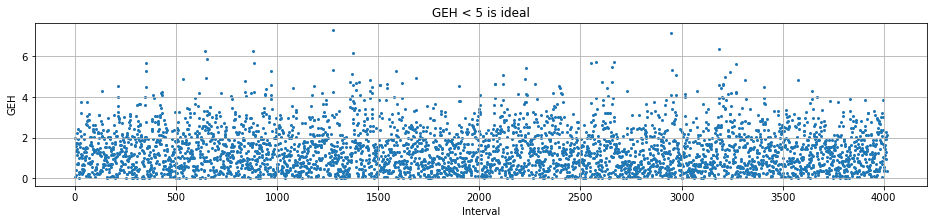

In [22]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(x, GEH, 4)
axes.set_xlabel('Interval')
axes.set_ylabel('GEH')
axes.set_title('GEH < 5 is ideal')
axes.grid()

In [23]:
GEH5 = num/len(GEH)

# 15 mins ahead

In [24]:
model15 = keras.models.load_model("my_dir/6a-LSTM-15")

### Evaluation on inverse_transform

In [25]:
test_predictions15 = model15.predict(Xv15)

yv15 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv15 = yv15[17:,4]

df = Test.drop(Test.head(17).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions15.flatten())

test_predictions15 = scaler.inverse_transform(df)

test_predictions15 = test_predictions15[:,4]

# MSE15 = mean_squared_error(yv15,test_predictions15)

# MAE15 = mean_absolute_error(yv15,test_predictions15)

# RMSE15 = np.sqrt(MSE15)

# MAPE15 = mean_absolute_percentage_error(yv15,test_predictions15)*100

# eval15 = [MSE15, MAE15, RMSE15, MAPE15]
# print(eval15)

In [26]:
RA10 = ra.RA_10(np.asarray(yv15), np.asarray(test_predictions15))
RA15 = ra.RA_15(np.asarray(yv15), np.asarray(test_predictions15))
RA20 = ra.RA_20(np.asarray(yv15), np.asarray(test_predictions15))

res15 = [RA10, RA15, RA20]
print(res15)

[61.22042341220424, 78.13200498132005, 88.44333748443337]


In [27]:
GEH, num, _, _ = ga.GEH(np.asarray(yv15), np.asarray(test_predictions15))

In [28]:
x = np.arange(1,len(GEH)+1)

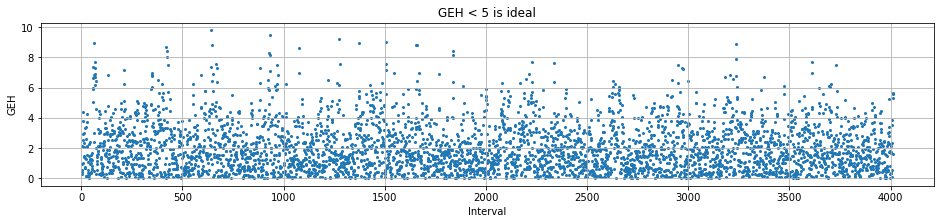

In [29]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(x, GEH, 4)
axes.set_xlabel('Interval')
axes.set_ylabel('GEH')
axes.set_title('GEH < 5 is ideal')
axes.grid()

In [30]:
GEH15 = num/len(GEH)

# 30 mins ahead

In [31]:
model30 = keras.models.load_model("my_dir/6a-LSTM-30")

### Evaluation on inverse_transform

In [32]:
test_predictions30 = model30.predict(Xv30)

yv30 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv30 = yv30[20:,4]

df = Test.drop(Test.head(20).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions30.flatten())

test_predictions30 = scaler.inverse_transform(df)

test_predictions30 = test_predictions30[:,4]

# MSE30 = mean_squared_error(yv30,test_predictions30)

# MAE30 = mean_absolute_error(yv30,test_predictions30)

# RMSE30 = np.sqrt(MSE30)

# MAPE30 = mean_absolute_percentage_error(yv30,test_predictions30)*100

# eval30 = [MSE30, MAE30, RMSE30, MAPE30]
# print(eval30)

In [33]:
RA10 = ra.RA_10(np.asarray(yv30), np.asarray(test_predictions30))
RA15 = ra.RA_15(np.asarray(yv30), np.asarray(test_predictions30))
RA20 = ra.RA_20(np.asarray(yv30), np.asarray(test_predictions30))

res30 = [RA10, RA15, RA20]
print(res30)

[60.29411764705882, 77.06879361914257, 86.64007976071785]


In [34]:
GEH, num, _, _ = ga.GEH(np.asarray(yv30), np.asarray(test_predictions30))

In [35]:
x = np.arange(1,len(GEH)+1)

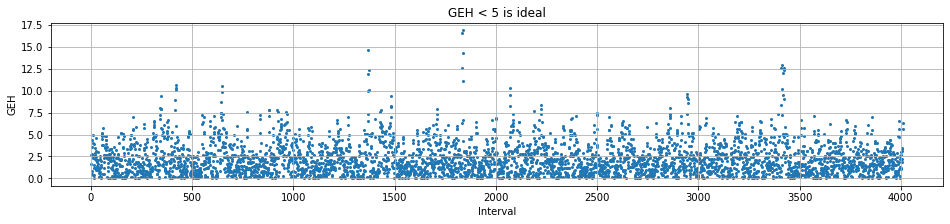

In [36]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(x, GEH, 4)
axes.set_xlabel('Interval')
axes.set_ylabel('GEH')
axes.set_title('GEH < 5 is ideal')
axes.grid()

In [37]:
GEH30 = num/len(GEH)

# 60 mins ahead

In [38]:
model60 = keras.models.load_model("my_dir/6a-LSTM-60")

### Evaluation on inverse_transform

In [39]:
test_predictions60 = model60.predict((Xv60))

yv60 = scaler.inverse_transform(Test.drop('Timestamp', axis = 1))
yv60 = yv60[26:,4]

df = Test.drop(Test.head(26).index)
df.reset_index(inplace = True)
df = df.drop(columns=['index','Timestamp'])
df['f5'] = pd.Series(test_predictions60.flatten())

test_predictions60 = scaler.inverse_transform(df)

test_predictions60 = test_predictions60[:,4]

# MSE60 = mean_squared_error(yv60,test_predictions60)

# MAE60 = mean_absolute_error(yv60,test_predictions60)

# RMSE60 = np.sqrt(MSE60)

# MAPE60 = mean_absolute_percentage_error(yv60,test_predictions60)*100

# eval60 = [MSE60, MAE60, RMSE60, MAPE60]
# print(eval60)

In [40]:
RA10 = ra.RA_10(np.asarray(yv60), np.asarray(test_predictions60))
RA15 = ra.RA_15(np.asarray(yv60), np.asarray(test_predictions60))
RA20 = ra.RA_20(np.asarray(yv60), np.asarray(test_predictions60))

res60 = [RA10, RA15, RA20]
print(res60)

[60.484273589615576, 78.30753869196205, 86.345481777334]


In [41]:
GEH, num, _, _ = ga.GEH(np.asarray(yv60), np.asarray(test_predictions60))

In [42]:
x = np.arange(1,len(GEH)+1)

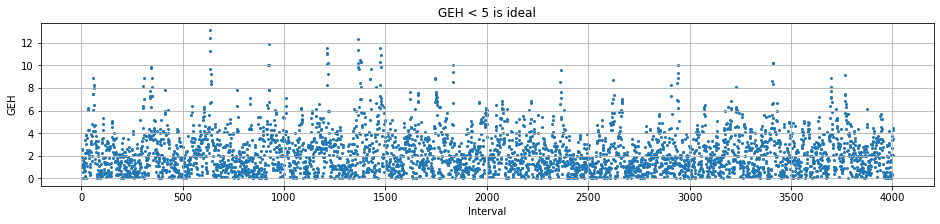

In [43]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(figsize=(16,3))

# Now use the axes object to add stuff to plot
axes.scatter(x, GEH, 4)
axes.set_xlabel('Interval')
axes.set_ylabel('GEH')
axes.set_title('GEH < 5 is ideal')
axes.grid()

In [44]:
GEH60 = num/len(GEH)

## GEH

In [ ]:
m = ["GEH5", "GEH15", "GEH30", "GEH60"]

In [ ]:
GEH = [GEH5, GEH15, GEH30, GEH60]

In [ ]:
data = np.asarray(GEH).reshape((1, 4))
df = pd.DataFrame(data=data,columns=m)
df